In [1]:
import cv2
import matplotlib.pyplot as plt
import zipfile
import tqdm

In [2]:
arquivo_proto = '../pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arquivos_pesos = '../pose/body/mpi/pose_iter_160000.caffemodel'

In [3]:
imagem = cv2.imread('../imagens/body/multiple/multiple_1.jpeg')

In [4]:
imagem.shape

(640, 640, 3)

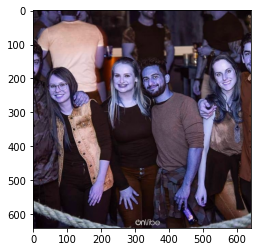

In [5]:
plt.imshow(imagem)

In [6]:
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]

In [7]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto,arquivos_pesos)

In [8]:
altura_entrada = 368
largura_entrada = int((altura_entrada/imagem_altura)*imagem_largura)

In [9]:
blob_entrada = cv2.dnn.blobFromImage(image = imagem, scalefactor=1.0 / 255,
                                     size = (largura_entrada, altura_entrada),mean = (0,0,0),
                                     swapRB =False,crop = False)

In [10]:
modelo.setInput(blob_entrada)
saida = modelo.forward()

In [11]:
saida[0][0]

array([[0.00049211, 0.00054041, 0.00080381, ..., 0.0004188 , 0.00048497,
        0.00056236],
       [0.00053339, 0.00058671, 0.00055662, ..., 0.00045707, 0.00048965,
        0.00057936],
       [0.00051214, 0.00057876, 0.00055863, ..., 0.00052235, 0.00050592,
        0.00054233],
       ...,
       [0.00052932, 0.00052271, 0.00055545, ..., 0.00058366, 0.00061254,
        0.00079496],
       [0.0005545 , 0.00055392, 0.00056722, ..., 0.00065917, 0.00077181,
        0.00096974],
       [0.00058384, 0.00059912, 0.00055851, ..., 0.00086402, 0.00097046,
        0.0009022 ]], dtype=float32)

In [12]:
ponto = 15
mapa_confianca = saida[0,ponto,:,:]
mapa_confianca = cv2.resize(mapa_confianca,(imagem_largura,imagem_altura))

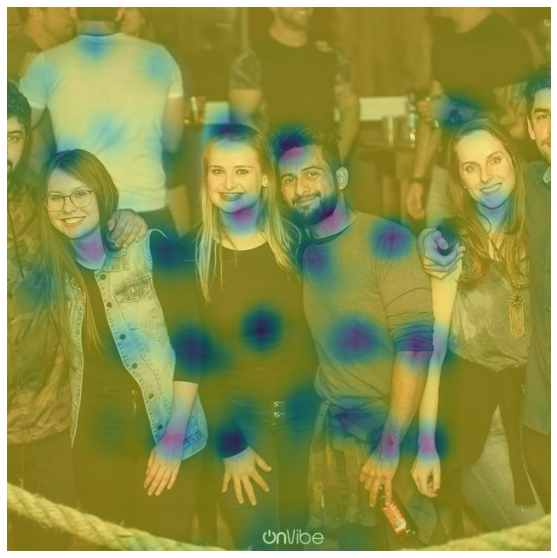

In [13]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca,alpha=0.5)
plt.axis('off')
plt = plt

# Lesson 2

In [14]:
imagem = cv2.imread('../imagens/body/single/single_3.jpg')

In [15]:
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]

In [16]:
numero_pontos = 15
pares_pontos = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],
              [14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]

In [17]:
pares_pontos

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [18]:
cor_ponto,cor_linha = (255,128,0), (7,62,248)

In [19]:
image_copia = np.copy(imagem)

In [20]:
altura_entrada = 368
largura_entrada = int((altura_entrada/imagem_altura)*imagem_largura)

In [21]:
blob_entrada = cv2.dnn.blobFromImage(image = imagem, scalefactor=1.0 / 255,
                                     size = (largura_entrada, altura_entrada),mean = (0,0,0),
                                     swapRB =False,crop = False)

In [22]:
modelo.setInput(blob_entrada)
saida = modelo.forward()

In [25]:
altura = saida.shape[2]
largura = saida.shape[3]

In [36]:
pontos = []
limite = 0.1
for i in range(numero_pontos):
    mapa_confianca = saida[0,i,:,:]
    _ ,confianca ,_ ,ponto = cv2.minMaxLoc(mapa_confianca)
    #print(confianca,ponto)
    
    x = (imagem_largura*ponto[0])/largura
    y = (imagem_altura * ponto[1]) / altura
    
    if confianca > limite :
        cv2.circle(image_copia, (int(x) , int(y)),8,
                   cor_ponto,thickness = -1 , lineType = cv2.FILLED)
        cv2.putText(image_copia,f'{i}' , (int(x),int(y)),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3, lineType = cv2.LINE_AA)
        pontos.append((int(x) , int(y)))
    else:
        pontos.append(None)

In [37]:
len(pontos)

15

In [38]:
tamanho = cv2.resize(imagem, (imagem_largura,imagem_altura))
mapa_suave = cv2.GaussianBlur(tamanho,(3,3), 0 , 0)
mascara_mapa = np.uint8(mapa_suave > limite)

In [40]:
for par in pares_pontos:
    parteA = par[0]
    parteB = par[1]
    
    if pontos[parteA] and pontos[parteB]:
        cv2.line(imagem , pontos[parteA],pontos[parteB],cor_linha,3)
        cv2.circle(imagem,pontos[parteA],8,cor_ponto,thickness = -1
                  )
        
        cv2.line(mascara_mapa , pontos[parteA],pontos[parteB],cor_linha,3)
        cv2.circle(mascara_mapa,pontos[parteA],8,cor_ponto,thickness = -1)
        
    

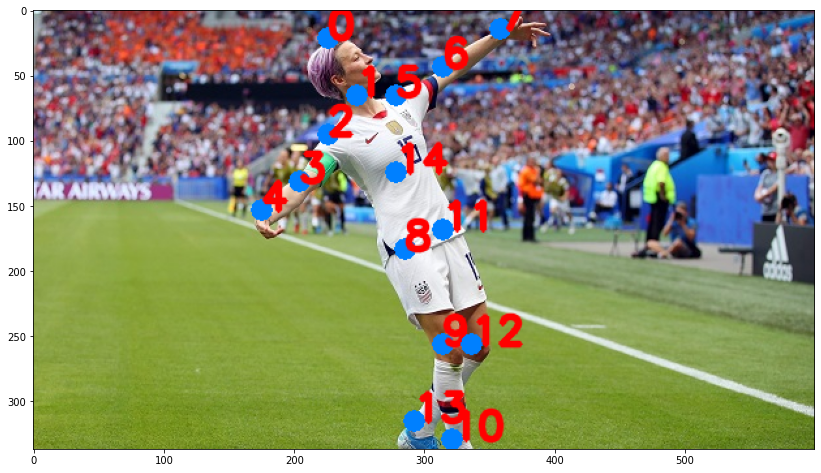

In [47]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image_copia,cv2.COLOR_BGR2RGB))

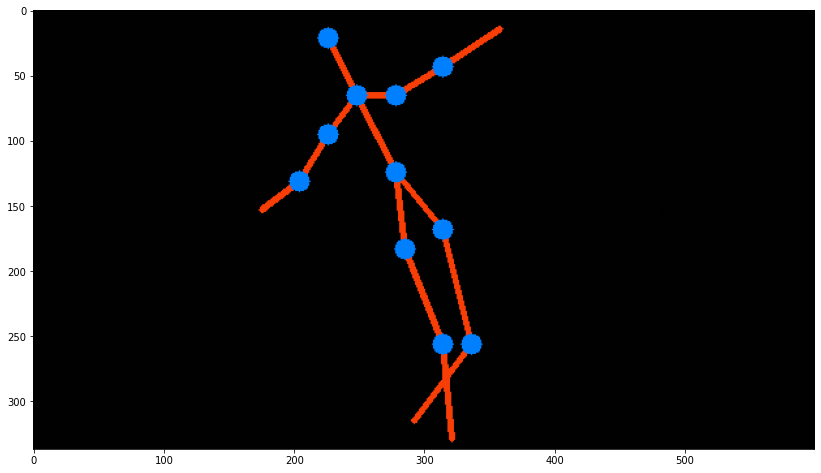

In [48]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(mascara_mapa,cv2.COLOR_BGR2RGB))